<a href="https://colab.research.google.com/github/happyhyowon/work/blob/master/HyowonKim_2019070723_Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right"> __Provided on April 16, Due on May 7__ [BRI516, Spring/2019] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python 3.5 
* Please upload your jupyter-notebook file for homework to `Blackboard`
* Please discuss your results at least one line of text

#### [Hw03] 

##### (1) Linear discriminant analysis (LDA):

Suppose we have two-classes and assume we have $m$-dimensional samples $\{ \bf{x}^1, \bf{x}^2, \cdots, \bf{x}^{N_i} \}$ belong to class $\omega_i$, where $i \in \{1, 2\}$.

The aim is to obtain a transformation of $\bf{x}$ to $y$ through projecting the samples in $\bf{x}$ onto a line with a scalar $y$:
$$ y = \bf{w}^T \bf{x} $$ 
where $\bf{w}$ is a projection vector.

(a) Show that an objective function to maximize for LDA can be represented as follows:

$$ J(w) \triangleq \frac{|\tilde{\mu}_1 - \tilde{\mu}_2|^2}{\tilde{s}_1^2 + \tilde{s}_2^2} = \frac{w^T S_B w}{w^T S_W w}, $$

where $\tilde{\mu}_i$ and $\tilde{s}_i^2$ are the mean value and variance of the $i^{th}$ class in the feature space $y$, respectively, and $\bf{S}_W$ and $\bf{S}_B$ are the within-class scatter matrix and between-class scatter matrix, respectively. 

* $ y = w^T x $ ................ 1)

  $ {\mu}_i = \frac{1}{N_i} \sum_{x \in w_i} x $ ................ 2)

  $ {\tilde\mu_i} = \frac{1}{N_i} \sum_{y \in w_i} y $ 
  
   위의 식은 1), 2)에 의해 아래와 같이 변경 가능하다.
  
    $ = \frac{1}{N_i} \sum_{x \in w_i} w^T \mu_i = w^T \frac{1}{N_i} \sum_{x \in w_i} x = w^T \mu_i$ ................ 3)
  
  $ {\tilde s^2 _i} =  \sum_{y \in w_i} (y - \tilde\mu_i)^2 $
  
    위의 식은 1), 3)에 의해 아래와 같이 변경 가능하다.
     
     $ = \sum_{x \in w_i} (w^T x - w^T \mu_i)^2 = \sum_{x \in w_i} w^T ( x - \mu_i)( x - \mu_i)^T w =w^T (\sum_{x \in w_i} ( x - \mu_i)( x - \mu_i)^T )w = w^T S_i w $ ................ 4)
     
     $ S_W = (S1 + S2), S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T $ ................ 5)
     
     위의 1), 2), 3), 4), 5) 를 사용하면
     
     ## $ J(w) \triangleq \frac{|\tilde{\mu}_1 - \tilde{\mu}_2|^2}{\tilde{s}_1^2 + \tilde{s}_2^2} = \frac{(\tilde\mu_1 - \tilde\mu_2)^2}{\tilde{s}_1^2 + \tilde{s}_2^2} = \frac{(w^T\mu_1 - w^T\mu_2)^2}{w^T S_1 w + w^T S_2 w}  = \frac{w^T(\mu_1 - \mu_2)(\mu_1 - \mu_2)^T w}{w^T (S_1 w + S_2) w} = \frac{w^T S_B w}{w^T S_W w}$ 
     로 보여 줄 수 있다.
    

    

(b) Show that the solution of the LDA can be given as the eigenvector of the following term:

$$ \bf{S}_X = \bf{S}_W^{-1} \bf{S}_B $$

* $J(w)$를 maximize하는 값을 찾기위해 미분을 하여 0이 되는 값을 찾아보자.

 $\frac {d}{dw} J(w) = \frac {d}{dw} \frac{w^T S_B w}{w^T S_W w} = 0 $
 
 $ = (w^T S_W w) \frac {d}{dw} (w^T S_B w) - (w^T S_B w) \frac {d}{dw} (w^T S_W w) = (w^T S_W w) 2S_B w - (w^T S_B w) 2S_W w = 0$
 
 $2w^T S_W w $ 로 양변을 나누면, (단, $2w^T S_W w != 0$)
 
 $= (\frac{w^T S_W w}{w^T S_W w}) S_B w - (\frac{w^T S_B w}{w^T S_W w}) S_W w $
 
 a)에 의해서
 
 $= S_B w - J(w) S_W w = 0$
 
 $= S^{-1} _W S_B w - J(w) w = 0$ ................ 6)
 
 위 6)을 정리하여 eigen vector, eigen value로 표현하면,
 
 $S^{-1} _W S_B w = \lambda w$, where $\lambda = J(w) = scalar$
 
 ## 따라서 eigen vector $S_X = S^{-1} _W S_B $로 표현 할 수 있다.

(c) Apply PCA and LDA to the Brest Cancer Wisconsin (BCW) data for feature extraction into two-dimensional space and compare the results.

#### - Import Library

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#### - Import Algorithm

In [0]:
## Feature Extraction
from sklearn.decomposition import PCA, KernelPCA # PCA : Unsupervised, Linear, KPCA : Unsupervised, Non-Linear
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # supervised, Linear

## Classifier
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # LR

#### - defined decision resion function

In [0]:
def plot_decision_regions_2D(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], alpha=0.6,c=c, edgecolor='black', label=l, marker=m)
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', alpha=1.0, edgecolor='black', linewidths=1, marker='o', s=55, label='test set')

#### - defined scatter plot function

In [0]:
def plot_scatter_2D(X, y, Xt, yt, str1, str2):
    fig = plt.figure(figsize=(15, 4))
    fig.patch.set_facecolor('lightcyan')

    colors = ['r', 'b', 'g']
    markers = ['s', 'x', 'o']

    ax1 = fig.add_subplot(1, 2, 1)
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, marker=m)
    ax1.set_title('Trainig Data')
    ax1.set_xlabel(str1)
    ax1.set_ylabel(str2)
    ax1.legend(loc='best')

    ax2 = fig.add_subplot(1, 2, 2)
    for l, c, m in zip(np.unique(yt), colors, markers):
        ax2.scatter(Xt[yt == l, 0], Xt[yt == l, 1], c=c, label=l, marker=m)
    ax2.set_title('Test Data')
    ax2.set_xlabel(str1)
    ax2.set_ylabel(str2)
    ax2.legend(loc='best')

#### - Loading the Breast Cancer Wisconsin dataset

In [0]:
## Loading the Breast Cancer Wisconsin dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
TEST_SIZE = 0.2

print('rows, columns:', df.shape)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### - Labeling

In [0]:
from sklearn.preprocessing import LabelEncoder

# 32개 (ID, 진단결과, 30개의 실측값, ref => https://gomguard.tistory.com/52)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B']) # M : 1, B : 0
#le.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']) # M : 1, B : 0

array([1, 0])

#### - Diving dataset into 80% for training and 20% for test (As same as our previous H/W condition ^^)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=1)

#### - Standardize the d-dimensional dataset

In [0]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### c-1) feature extraction into two-dimensional space(PCA & LDA)

In [0]:
## PCA
pca = PCA(n_components=2)
print("PCA : ", pca)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("\nexplained variance ratio(first two components) : %s \n" %(pca.explained_variance_ratio_) )

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

PCA :  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

explained variance ratio(first two components) : [0.45240302 0.17810349] 



Text(0.5, 1.0, 'Cumulative Explained Variance vs Dimension')

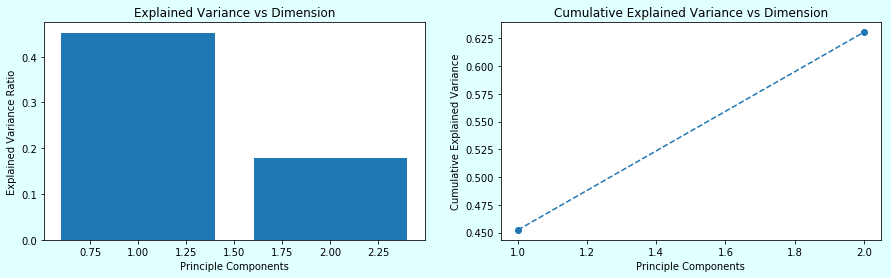

In [0]:
#Plot Variance Ratio for PCA
fig = plt.figure(figsize=(15, 4))
fig.patch.set_facecolor('lightcyan')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
ax1.set_xlabel('Principle Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance vs Dimension')

ax2 = fig.add_subplot(1, 2, 2)
cummulative_explained_variance_ = np.cumsum(pca.explained_variance_ratio_)
ax2.plot(range(1, len(pca.explained_variance_ratio_)+1), cummulative_explained_variance_, '--o')
ax2.set_xlabel('Principle Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance vs Dimension')

In [1]:
plot_scatter_2D(X_train_pca, y_train, X_test_pca, y_test, "PC1", "PC2")

NameError: ignored

In [0]:
## LDA
lda = LDA(n_components=2, store_covariance=True)
print("LDA : ", lda)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
print("\nexplained variance ratio(first two components) : %s \n" %(lda.explained_variance_ratio_) )

LDA :  LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

explained variance ratio(first two components) : [1.] 



Text(0.5, 1.0, 'Cumulative Explained Variance vs Dimension')

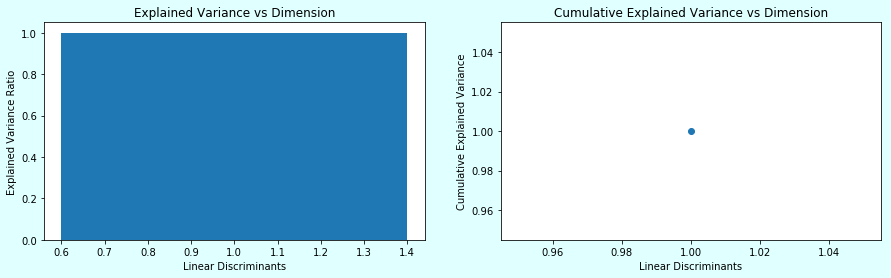

In [0]:
#Plot Variance Ratio for LDA
fig = plt.figure(figsize=(15, 4))
fig.patch.set_facecolor('lightcyan')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(range(1, len(lda.explained_variance_ratio_)+1), lda.explained_variance_ratio_)
ax1.set_xlabel('Linear Discriminants')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance vs Dimension')

ax2 = fig.add_subplot(1, 2, 2)
cummulative_explained_variance_ = np.cumsum(lda.explained_variance_ratio_)
ax2.plot(range(1, len(lda.explained_variance_ratio_)+1), cummulative_explained_variance_, '--o')
ax2.set_xlabel('Linear Discriminants')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance vs Dimension')

* 매우 이상하다. 이유는 현재 2개의 components를 선택하였는데 eigen value가 1나 밖에 나오지 않는다. 그래서 이전 숙제에서 한 함수를 가져와서 적용하여 보았다.

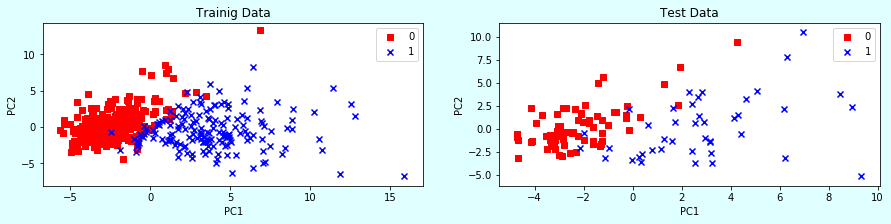

In [0]:
plot_scatter_2D(X_train_pca, y_train, X_test_pca, y_test, "PC1", "PC2")

#### c-2) compare the results

(d) Apply the LR and SVM classifiers to the extracted features from (c) and compare the classification performance.

#### d-1) Apply the LR and SVM classifiers to the extracted features from (c) 

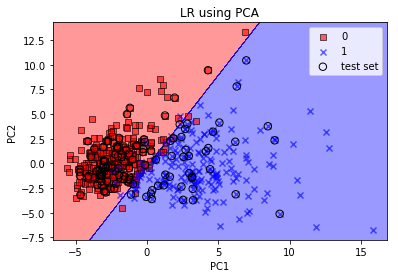

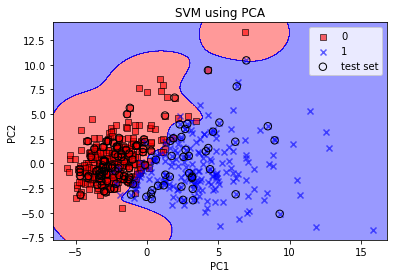

In [0]:
## LR using PCA
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
plot_decision_regions_2D(X_combined_pca, y_combined, classifier=lr_pca, 
                         test_idx=range(len(X_train_pca), len(X_combined_pca)))
plt.title('LR using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

## SVM using PCA
svm_pca = SVC(kernel='rbf', C=100.0, random_state=0, gamma='scale')#SVC(kernel='linear', C=1.0, random_state=0)
svm_pca.fit(X_train_pca, y_train)
plot_decision_regions_2D(X_combined_pca, y_combined, classifier=svm_pca, 
                         test_idx=range(len(X_train_pca), len(X_combined_pca)))
plt.title('SVM using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()


#### d-2) compare the classification performance

##### (2) Kernel principal component analysis (KPCA):

Suppose that the mean of the $d$-dimensional data in the kernal feature space is:
$$ \mu = \frac{1}{n} \sum^n_{i=1} \phi (x_i) = 0 $$

And, the covariance is :
$$ C = \frac{1}{n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T $$

Thus, eigen-decomposition is as follows:
$$ C \bf{\nu} = \lambda \bf{\nu} $$

(a) Show that the $j^{th}$ eigenvector can be expressed as a linear combination of features:

$$ {\bf{\nu}}_j = \sum^n_{i=1} \alpha_{ji} \phi(x_i), $$
where $\alpha_{ji}$ is a coefficient.

* $C \bf{\nu} = \lambda \bf{\nu} $

 위 식에 kernel feature에 대한 mean과 covariance를 대입하면,
 
  $ \frac{1}{n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T \bf{\nu} = \lambda \bf{\nu} $................ 1)
  
  $ \lambda \bf{\nu} = \frac{1}{n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T \bf{\nu} $
  
  lineaqr algrebra에서 $xx^T v = (x \dot\ v ) x^T$를 사용하여 정리하면
  
  =>  $ \bf{\nu} = \frac{1}{\lambda n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T \bf{\nu} =  \frac{1}{\lambda n} \sum^n_{i=1} (\phi ( x_i) \dot\ \bf{\nu}){\phi(x_i)}^T =  \sum^n_{i=1} \frac{1}{\lambda n}(\phi ( x_i) \dot\ \bf{\nu}){\phi(x_i)}^T$
  
  백터의 dot을의 결과는 scalar이므로 $\alpha_{i} = \frac{1}{\lambda n}(\phi ( x_i) \dot\ \bf{\nu}) $로 정리하면,
  
  $ \bf{\nu} = \sum^n_{i=1} \alpha_{i} \phi ( x_i) $
  
  로 표현할 수 있고, 따라서 j번째 eigen vector는 아래와 같이 표현 가능하다.
  
  ## $ \bf{\nu}_{j} = \sum^n_{i=1} \alpha_{ji} \phi ( x_i) $ ................ 2)
  

(b) Show that the coefficient $\alpha_{ji}$ is obtained from the eigenvector of the kernel matrix:

$$ K \alpha_j = \lambda_j \alpha_j, $$
where $K_{ij} = K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $ 

* $C \bf{\nu} = \lambda \bf{\nu} $를 a)의 j번째에 대하여 1), 2)번을 사용하여 다시 표현하면,

 $ \frac{1}{n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T \bf{\nu}_{j} = \lambda_{j} \bf{\nu}_{j} $
 
  => $ \frac{1}{n} \sum^n_{i=1} \phi ( x_i) {\phi(x_i)}^T (\sum^n_{l=1} \alpha_{jl} \phi ( x_l)) = \lambda_{j} \sum^n_{l=1} \alpha_{jl} \phi ( x_l) $
  
  $K_{ij} = K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $ 사용하여 정리하면,
  
  => $ \frac{1}{n} \sum^n_{i=1} \phi ( x_i) (\sum^n_{l=1} \alpha_{jl} {\phi(x_i)}^T \phi ( x_l)) = \lambda_{j} \sum^n_{l=1} \alpha_{jl} \phi ( x_l) $
  
  => $ \frac{1}{n} \sum^n_{i=1} \phi ( x_i) (\sum^n_{l=1} \alpha_{jl} K(x_i, x_j)) = \lambda_{j} \sum^n_{l=1} \alpha_{jl} \phi ( x_l) $
  
  양변의 왼쪽에 $ \phi ( x_k) $ 를 곱하면,
  
  => $ \frac{1}{n} \sum^n_{i=1} \phi ( x_k)^T \phi ( x_i) (\sum^n_{l=1} \alpha_{jl} K(x_i, x_j)) = \lambda_{j} \sum^n_{l=1} \alpha_{jl} \phi ( x_k)^T \phi ( x_l) $
  
  => $ \frac{1}{n} K^2 = \lambda_{j} K \alpha_{j} $
  
  $ \frac{n}{K} $로 양변을 나누고 정리하면,
  
  ## 따라서, $ K = n \lambda_{j} \alpha_{j} $로 표현할 수 있다.
  
  
  

(c) Show that the zero-meaned kernel matrix is represented as follows:

$$ \tilde{K} = K - 2\bf{1}_{1/n} K + \bf{1}_{1/n} K \bf{1}_{1/n}, $$
where $\bf{1}_{1/n}$ is a matrix with all elements $1/n$.

* $ \phi(x_i) $를 zero-mean으로 normalization한 feature를 $ \tilde \phi(x_i) $라고 하면,

 $ \tilde \phi(x_i) = \phi(x_i) - \frac{1}{n} \sum^n_{k=1} \phi ( x_k) $  ................ 3) 으로 표현 할 수 있다.
 
 $ \tilde K(x_i, x_j) = \tilde \phi(x_i)^T \tilde \phi(x_j)  $
 
 3)에 의해서 우변을 전계하면,
 
 $ = (\phi(x_i) - \frac{1}{n} \sum^n_{k=1} \phi ( x_k) )^T (\phi(x_j) - \frac{1}{n} \sum^n_{k=1} \phi ( x_k) ) $
 
 $ =  \phi(x_i)^T \phi(x_j) - \frac{1}{n} \sum^n_{k=1} \phi ( x_i)^T \phi(x_k) - \frac{1}{n} \sum^n_{k=1} \phi ( x_k)^T \phi(x_j) +\frac{1}{n^2} \sum^n_{l=1} \phi ( x_l)^T \sum^n_{k=1} \phi ( x_k)$
 
 $ = K(x_i, x_j) - \frac{1}{n} \sum^n_{k=1} K(x_i, x_k) - \frac{1}{n} \sum^n_{k=1} K(x_j, x_k) + \frac{1}{n^2} \sum^n_{l, k=1} \phi ( x_l)^T \phi ( x_k) $
 
  따라서, $ \tilde K(x_i, x_j) $는 아래와 같이 표현 가능하다.
 
 $ \tilde K(x_i, x_j) = K(x_i, x_j) - \frac{1}{n} \sum^n_{k=1} K(x_i, x_k) - \frac{1}{n} \sum^n_{k=1} K(x_j, x_k) + \frac{1}{n^2} \sum^n_{l, k=1} K(x_l, x_k) $
 
  matrix form으로 표현하면,
  
  ## $ \tilde K = K - \bf{1}_{1/n} K - \bf{1}_{1/n} K + \bf{1}_{1/n} K \bf{1}_{1/n} = K - 2\bf{1}_{1/n} K + \bf{1}_{1/n} K \bf{1}_{1/n}, $
where $\bf{1}_{1/n}$ is a matrix with all elements $1/n$
 

(d) Show that any data point, $x$ can be represented as:

$$ y_j = \sum^n_{i=1} \alpha_{ji} K(x, x_i), j = 1, \cdots, d $$

* $ {\bf{\nu}}_j = \sum^n_{i=1} \alpha_{ji} \phi(x_i), j = 1, ..., d $ 를 사용하여
  
  eigen vector $ \bf{\nu}_j $에 project된 any $ x $에 대하여 표현하면,
  
  $<\bf{\nu}_j, \phi (x)> = \sum^{n}_{i=1} \alpha_{ji} <\phi(x_i), \phi(x)> $
  
  $ y_j = <\bf{\nu}_j, \phi (x)> $ 라고 놓으면,
  
  $ y_j = \sum^{n}_{i=1} \alpha_{ji}  \phi(x_i)^T\phi(x) $
  
  따라서, 아래와 같이 표현 할 수 있음을 보일수 있다.
  
  ## $ y_j = \sum^{n}_{i=1} \alpha_{ji}  K(x_i, x) = \sum^{n}_{i=1} \alpha_{ji}  K(x, x_i), j = 1, ..., d $

(e) Apply the KPCA to the BCW data for two dimensional feature extraction and compare the results with (1-c).

In [0]:
## KPCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
print("KPCA : ", kpca)
X_train_kpca = kpca.fit_transform(X_train_std)
X_test_kpca = kpca.transform(X_test_std)

KPCA :  KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.01, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)


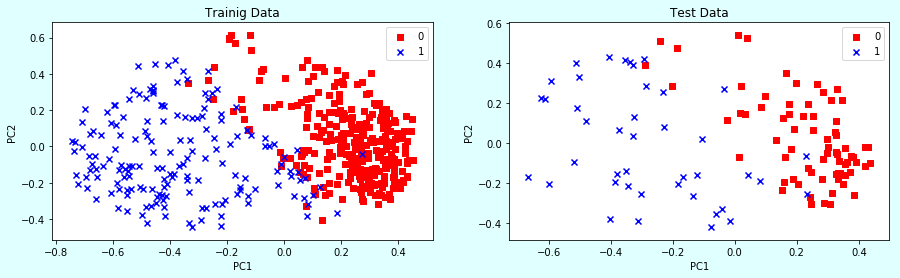

In [0]:
plot_scatter_2D(X_train_kpca, y_train, X_test_kpca, y_test, "PC1", "PC2")

(f) Apply the LR and SVM classifiers to the extracted features from (e) and compare the classification performance with (1-d)

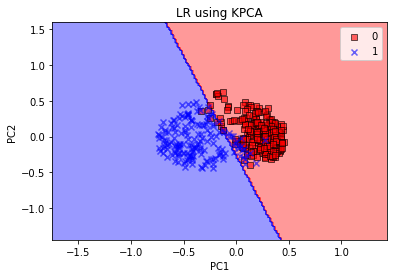

In [0]:
## LR using KPCA
lr_kpca = LogisticRegression()
lr_kpca.fit(X_train_kpca, y_train)
plot_decision_regions_2D(X_train_kpca, y_train, classifier=lr_kpca)
plt.title('LR using KPCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

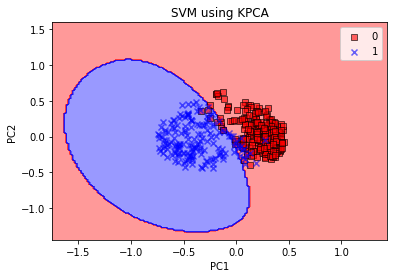

In [0]:
## SVM using KPCA
svm_kpca = SVC(kernel='rbf', C=1.0, random_state=0, gamma='scale')#SVC(kernel='linear', C=1.0, random_state=0)
svm_kpca.fit(X_train_kpca, y_train)
plot_decision_regions_2D(X_train_kpca, y_train, classifier=svm_kpca)
plt.title('SVM using KPCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()